In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_selection import mutual_info_classif

In [304]:
# Load the dataset
data = pd.read_csv(r"C:\Users\SEJAL WAGH\Downloads\Cleveland Dataset\dataset.csv")

In [305]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [306]:
X = data.drop('target', axis=1)
y = data['target']

In [307]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [308]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [309]:
# SVM with RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluate RBF kernel
print("RBF Kernel SVM")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("Classification Report:\n", classification_report(y_test, y_pred_rbf))

RBF Kernel SVM
Accuracy: 0.9016393442622951
Confusion Matrix:
 [[27  2]
 [ 4 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [310]:
# SVM with Sigmoid kernel
svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = svm_sigmoid.predict(X_test)

# Evaluate Sigmoid kernel
print("\nSigmoid Kernel SVM")
print("Accuracy:", accuracy_score(y_test, y_pred_sigmoid))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sigmoid))
print("Classification Report:\n", classification_report(y_test, y_pred_sigmoid))


Sigmoid Kernel SVM
Accuracy: 0.8852459016393442
Confusion Matrix:
 [[25  4]
 [ 3 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [311]:
from sklearn.model_selection import GridSearchCV

In [312]:
# Define the parameter grid for RBF kernel
param_grid_rbf = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Define the parameter grid for Sigmoid kernel
param_grid_sigmoid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['sigmoid']
}

In [313]:
# Perform Grid Search for RBF kernel
grid_rbf = GridSearchCV(SVC(probability=True), param_grid_rbf, scoring='neg_log_loss', refit=True, verbose=3)
grid_rbf.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.635 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.623 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.603 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.615 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.645 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.469 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.335 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.486 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.413 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.460 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.438 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;,

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring='neg_log_loss', verbose=3)

In [314]:
# Perform Grid Search for Sigmoid kernel
grid_sigmoid = GridSearchCV(SVC(probability=True), param_grid_sigmoid, scoring='neg_log_loss', refit=True, verbose=3)
grid_sigmoid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ...C=0.1, gamma=1, kernel=sigmoid;, score=-0.446 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=1, kernel=sigmoid;, score=-0.355 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=1, kernel=sigmoid;, score=-0.482 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=1, kernel=sigmoid;, score=-0.435 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=1, kernel=sigmoid;, score=-0.453 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=0.1, kernel=sigmoid;, score=-0.441 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.1, kernel=sigmoid;, score=-0.311 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=0.1, kernel=sigmoid;, score=-0.448 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=0.1, kernel=sigmoid;, score=-0.414 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=0.1, kernel=sigmoid;, score=-0.401 total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.01, kernel=sigmoid;, score=-0.424 total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.01, kernel=sigmoid;,

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['sigmoid']},
             scoring='neg_log_loss', verbose=3)

In [315]:
# Evaluate RBF kernel
print("Best parameters for RBF kernel:", grid_rbf.best_params_)
y_pred_rbf = grid_rbf.predict(X_test)
print("Accuracy (RBF):", accuracy_score(y_test, y_pred_rbf))
print("Confusion Matrix (RBF):\n", confusion_matrix(y_test, y_pred_rbf))
print("Classification Report (RBF):\n", classification_report(y_test, y_pred_rbf))

print("Best parameters for RBF kernel:", grid_rbf.best_params_)
y_pred_rbf_log_loss = grid_rbf.predict_proba(X_test)
print("Log Loss (RBF):", log_loss(y_test, y_pred_rbf_log_loss))

Best parameters for RBF kernel: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy (RBF): 0.9016393442622951
Confusion Matrix (RBF):
 [[26  3]
 [ 3 29]]
Classification Report (RBF):
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Best parameters for RBF kernel: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Log Loss (RBF): 0.3068759478479112


In [316]:
# Evaluate Sigmoid kernel
print("\nBest parameters for Sigmoid kernel:", grid_sigmoid.best_params_)
y_pred_sigmoid = grid_sigmoid.predict(X_test)
print("Accuracy (Sigmoid):", accuracy_score(y_test, y_pred_sigmoid))
print("Confusion Matrix (Sigmoid):\n", confusion_matrix(y_test, y_pred_sigmoid))
print("Classification Report (Sigmoid):\n", classification_report(y_test, y_pred_sigmoid))

print("\nBest parameters for Sigmoid kernel:", grid_sigmoid.best_params_)
y_pred_sigmoid_log_loss = grid_sigmoid.predict_proba(X_test)
print("Log Loss (Sigmoid):", log_loss(y_test, y_pred_sigmoid_log_loss))


Best parameters for Sigmoid kernel: {'C': 100, 'gamma': 0.001, 'kernel': 'sigmoid'}
Accuracy (Sigmoid): 0.9016393442622951
Confusion Matrix (Sigmoid):
 [[26  3]
 [ 3 29]]
Classification Report (Sigmoid):
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61


Best parameters for Sigmoid kernel: {'C': 100, 'gamma': 0.001, 'kernel': 'sigmoid'}
Log Loss (Sigmoid): 0.3410516046055424


In [317]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [318]:
# Calculate mutual information scores for each feature
mi_scores = mutual_info_classif(X_train, y_train, discrete_features='auto', random_state=23)

In [319]:
# Create a DataFrame to display the mutual information scores for each feature
feature_mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Information': mi_scores})
feature_mi_df = feature_mi_df.sort_values(by='Mutual_Information', ascending=False)

In [320]:
# Display the features with their corresponding mutual information scores
print("Mutual Information Scores:")
print(feature_mi_df)

Mutual Information Scores:
     Feature  Mutual_Information
2         cp            0.175804
12      thal            0.144046
8      exang            0.108096
11        ca            0.101152
9    oldpeak            0.097061
7    thalach            0.093386
10     slope            0.091196
4       chol            0.060754
6    restecg            0.047544
3   trestbps            0.032778
5        fbs            0.022352
0        age            0.000000
1        sex            0.000000


In [321]:
# Select the top k features based on mutual information scores
k = 7
selected_features = feature_mi_df.head(k)['Feature'].tolist()

In [322]:
print(selected_features)

['cp', 'thal', 'exang', 'ca', 'oldpeak', 'thalach', 'slope']


In [323]:
# import plotly.express as px
# # Create an interactive bar plot using Plotly
# fig = px.bar(feature_mi_df, x='Mutual_Information', y='Feature', orientation='h', 
#              title='Mutual Information Scores by Feature', 
#              labels={'Mutual_Information': 'Mutual Information Score', 'Feature': 'Feature'},
#              height=600)
# fig.show()

In [324]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

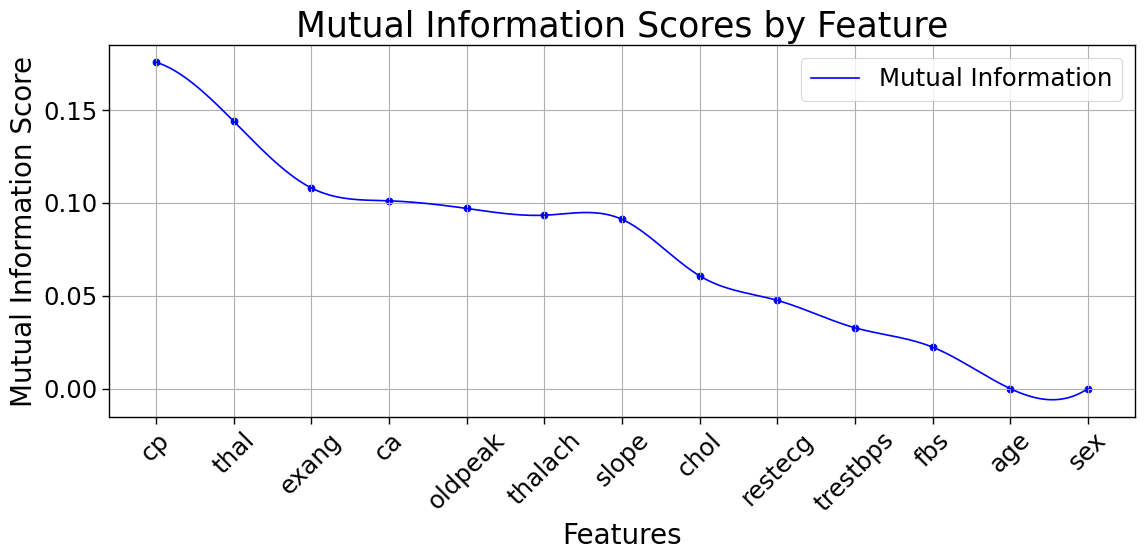

In [325]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Extract the data
features = feature_mi_df['Feature']
mi_scores = feature_mi_df['Mutual_Information']

# Convert features to numerical values for interpolation
x = np.arange(len(features))
y = mi_scores

# Create spline interpolation of the data
x_smooth = np.linspace(x.min(), x.max(), 500)
spl = make_interp_spline(x, y, k=3)  # k=3 for cubic spline
y_smooth = spl(x_smooth)

# Plot the smooth curve
plt.figure(figsize=(12, 6))
plt.plot(x_smooth, y_smooth, color='b', label='Mutual Information')

# Add markers at the original data points
plt.scatter(x, y, color='b', marker='o')

# Customize the plot
plt.title('Mutual Information Scores by Feature')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.xticks(x, features, rotation=45)  # Set the x-ticks to the feature names
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [326]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming 'data' is your DataFrame containing the data
# # Replace this with your actual data source or dataframe
# # data = pd.read_csv('your_dataset.csv')

# # Assuming 'features' is the list of features in the specified order
# features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
#             'restecg', 'thalach', 'exang', 'oldpeak', 
#             'slope', 'ca', 'thal']

# # Plotting each feature
# for feature in features:
#     plt.figure(figsize=(8, 6))
#     sns.histplot(data=data, x=feature, kde=True, bins=30)
#     plt.title(f"Distribution of {feature}")
#     plt.xlabel(feature)
#     plt.ylabel("Frequency")
#     plt.grid(True)
#     plt.show()

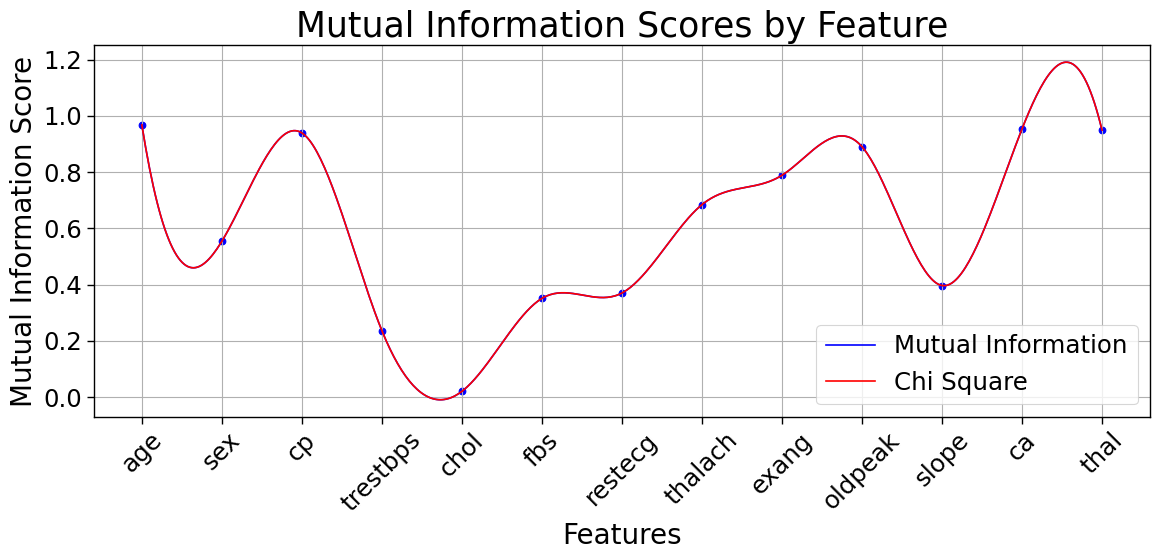

In [327]:
from scipy.interpolate import make_interp_spline

# Your feature list in the specified order
ordered_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
                    'restecg', 'thalach', 'exang', 'oldpeak', 
                    'slope', 'ca', 'thal']

# Sample feature_mi_df
feature_mi_df = pd.DataFrame({
    'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'],
    'Mutual_Information': np.random.rand(13)  # Replace with your actual MI scores
})

# Ensure feature_mi_df is ordered according to the specified list
feature_mi_df['Feature'] = pd.Categorical(feature_mi_df['Feature'], categories=ordered_features, ordered=True)
feature_mi_df = feature_mi_df.sort_values('Feature')

# Extract the data in the specified order
features = feature_mi_df['Feature']
mi_scores = feature_mi_df['Mutual_Information']

# Convert features to numerical values for interpolation
x = np.arange(len(features))
y = mi_scores

# Create spline interpolation of the data
x_smooth = np.linspace(x.min(), x.max(), 500)
spl = make_interp_spline(x, y, k=3)  # k=3 for cubic spline
y_smooth = spl(x_smooth)

# Plot the smooth curve
plt.figure(figsize=(12, 6))
plt.plot(x_smooth, y_smooth, color='b', label='Mutual Information')
plt.plot(x_smooth, y_smooth, color='r', label='Chi Square')

# Add markers at the original data points
plt.scatter(x, y, color='b', marker='o')

# Customize the plot
plt.title('Mutual Information Scores by Feature')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.xticks(x, features, rotation=45)  # Set the x-ticks to the feature names
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [328]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Load the Cleveland heart disease dataset
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
heart_data = pd.read_csv(data_url, names=column_names, na_values='?')

# Drop rows with missing values
heart_data.dropna(inplace=True)

# Separate features and target
X = heart_data.drop('target', axis=1)
y = heart_data['target']

# Initialize SelectKBest with the chi2 scoring function
k = 9  # Select top 5 features, you can adjust this number
selector = SelectKBest(score_func=chi2, k=k)

# Fit selector to the data
selector.fit(X, y)

# Get the chi2 scores and p-values for each feature
scores = selector.scores_
p_values = selector.pvalues_

# Create a DataFrame to store feature names, scores, and p-values
feature_scores_df = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': scores,
    'P-value': p_values
})

# Sort the DataFrame by chi2 scores in descending order
feature_scores_df = feature_scores_df.sort_values(by='Chi2 Score', ascending=False)

# Print the feature scores table
print("Feature Scores Table:")
print(feature_scores_df)

Feature Scores Table:
     Feature  Chi2 Score       P-value
7    thalach  219.883557  1.986038e-46
11        ca  107.213553  2.858376e-22
9    oldpeak   98.505523  2.046244e-20
12      thal   70.520283  1.762563e-14
8      exang   39.119182  6.582518e-08
4       chol   38.167452  1.034874e-07
0        age   27.975233  1.261793e-05
3   trestbps   19.348090  6.713433e-04
2         cp   16.383180  2.545823e-03
6    restecg   13.026434  1.114735e-02
10     slope   10.178421  3.752710e-02
1        sex    7.511646  1.111968e-01
5        fbs    6.778461  1.480690e-01


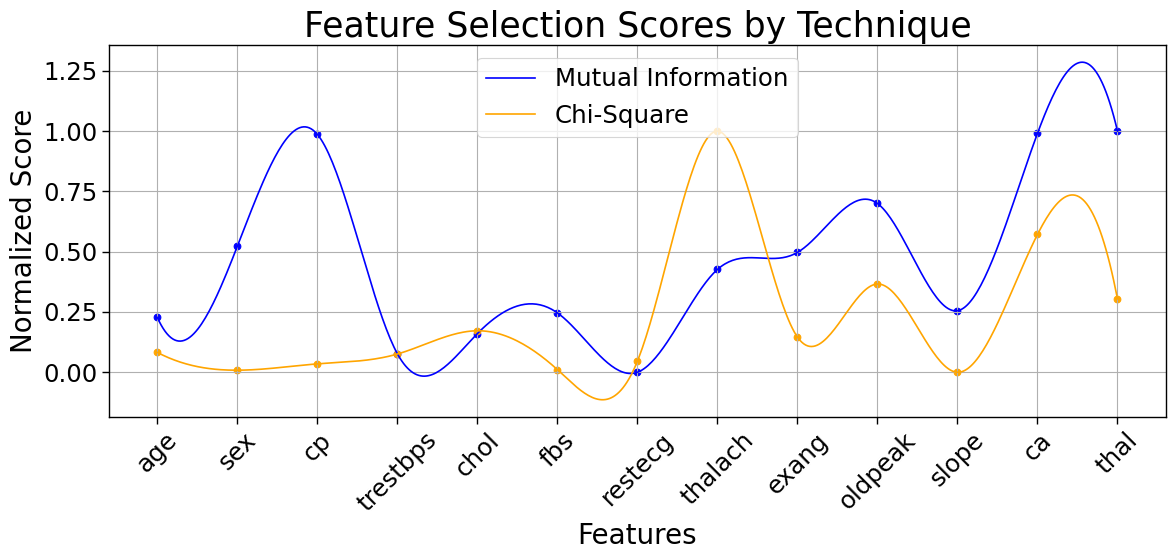

In [329]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from sklearn.feature_selection import mutual_info_classif, SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the Cleveland heart disease dataset
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
heart_data = pd.read_csv(data_url, names=column_names, na_values='?')

# Drop rows with missing values
heart_data.dropna(inplace=True)

# Separate features and target
X = heart_data.drop('target', axis=1)
y = heart_data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Calculate mutual information scores
mi_scores = mutual_info_classif(X_train, y_train, discrete_features='auto', random_state=23)

# Calculate Chi-Square scores
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X_train, y_train)
chi2_scores = chi2_selector.scores_

# Normalize the scores to be on the same scale
scaler = MinMaxScaler()
mi_scores = scaler.fit_transform(mi_scores.reshape(-1, 1)).flatten()
chi2_scores = scaler.fit_transform(chi2_scores.reshape(-1, 1)).flatten()

# Create a DataFrame to display the scores for each feature
feature_scores_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual_Information': mi_scores,
    'Chi_Square': chi2_scores
})

# Ensure the DataFrame is ordered according to the specified feature list
ordered_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
                    'restecg', 'thalach', 'exang', 'oldpeak', 
                    'slope', 'ca', 'thal']
feature_scores_df['Feature'] = pd.Categorical(feature_scores_df['Feature'], categories=ordered_features, ordered=True)
feature_scores_df = feature_scores_df.sort_values('Feature')

# Extract the data in the specified order
features = feature_scores_df['Feature']
mi_scores = feature_scores_df['Mutual_Information']
chi2_scores = feature_scores_df['Chi_Square']

# Convert features to numerical values for interpolation
x = np.arange(len(features))

# Create spline interpolation of the data for smooth curves
x_smooth = np.linspace(x.min(), x.max(), 500)
spl_mi = make_interp_spline(x, mi_scores, k=3)  # k=3 for cubic spline
spl_chi2 = make_interp_spline(x, chi2_scores, k=3)
y_smooth_mi = spl_mi(x_smooth)
y_smooth_chi2 = spl_chi2(x_smooth)

# Plot the smooth curves
plt.figure(figsize=(12, 6))
plt.plot(x_smooth, y_smooth_mi, color='b', label='Mutual Information')
plt.plot(x_smooth, y_smooth_chi2, color='orange', label='Chi-Square')

# Add markers at the original data points
plt.scatter(x, mi_scores, color='b', marker='o')
plt.scatter(x, chi2_scores, color='orange', marker='o')

# Customize the plot
plt.title('Feature Selection Scores by Technique')
plt.xlabel('Features')
plt.ylabel('Normalized Score')
plt.xticks(x, features, rotation=45)  # Set the x-ticks to the feature names
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [330]:
from sklearn.feature_selection import SelectKBest, f_classif

# Separate features (X) and target variable (Y)
X = data.drop(columns=['target'])
Y = data['target']

# Perform ANOVA F-value feature selection
selector = SelectKBest(score_func=f_classif, k='all')
X_selected = selector.fit_transform(X, Y)

# Get selected feature names and their corresponding F-values
selected_features_df = pd.DataFrame({'Feature': X.columns, 'F-value': selector.scores_})
selected_features_df = selected_features_df.sort_values(by='F-value', ascending=False)

# Display the selected features in a table format
print(selected_features_df)

     Feature     F-value
12      thal  109.163583
11        ca   80.800610
8      exang   69.020891
9    oldpeak   66.166707
7    thalach   63.419223
2         cp   62.423779
10     slope   39.138194
1        sex   24.978872
0        age   15.769637
6    restecg    8.871394
3   trestbps    7.006632
4       chol    2.199054
5        fbs    0.192237


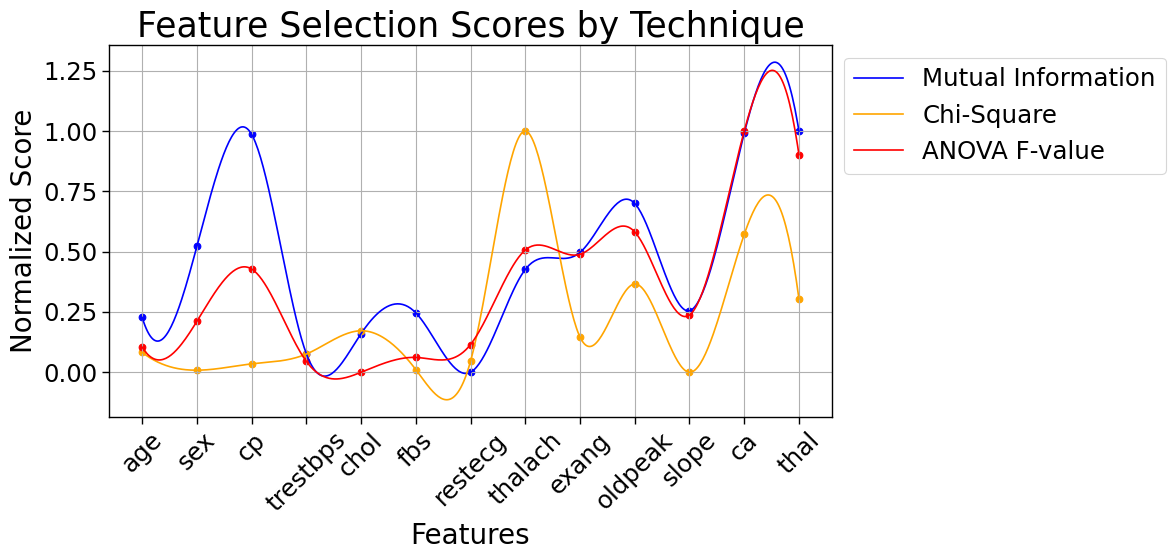

In [331]:
from scipy.interpolate import make_interp_spline
from sklearn.preprocessing import MinMaxScaler


# Calculate mutual information scores
mi_scores = mutual_info_classif(X_train, y_train, discrete_features='auto', random_state=23)

# Calculate Chi-Square scores
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X_train, y_train)
chi2_scores = chi2_selector.scores_

# Calculate ANOVA F-value scores
f_selector = SelectKBest(score_func=f_classif, k='all')
f_selector.fit(X_train, y_train)
f_scores = f_selector.scores_

# Normalize the scores to be on the same scale
scaler = MinMaxScaler()
mi_scores = scaler.fit_transform(mi_scores.reshape(-1, 1)).flatten()
chi2_scores = scaler.fit_transform(chi2_scores.reshape(-1, 1)).flatten()
f_scores = scaler.fit_transform(f_scores.reshape(-1, 1)).flatten()

# Create a DataFrame to display the scores for each feature
feature_scores_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual_Information': mi_scores,
    'Chi_Square': chi2_scores,
    'ANOVA_F': f_scores
})

# Ensure the DataFrame is ordered according to the specified feature list
ordered_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
                    'restecg', 'thalach', 'exang', 'oldpeak', 
                    'slope', 'ca', 'thal']
feature_scores_df['Feature'] = pd.Categorical(feature_scores_df['Feature'], categories=ordered_features, ordered=True)
feature_scores_df = feature_scores_df.sort_values('Feature')

# Extract the data in the specified order
features = feature_scores_df['Feature']
mi_scores = feature_scores_df['Mutual_Information']
chi2_scores = feature_scores_df['Chi_Square']
f_scores = feature_scores_df['ANOVA_F']

# Convert features to numerical values for interpolation
x = np.arange(len(features))

# Create spline interpolation of the data for smooth curves
x_smooth = np.linspace(x.min(), x.max(), 500)
spl_mi = make_interp_spline(x, mi_scores, k=3)  # k=3 for cubic spline
spl_chi2 = make_interp_spline(x, chi2_scores, k=3)
spl_f = make_interp_spline(x, f_scores, k=3)
y_smooth_mi = spl_mi(x_smooth)
y_smooth_chi2 = spl_chi2(x_smooth)
y_smooth_f = spl_f(x_smooth)

# Plot the smooth curves
plt.figure(figsize=(12, 6))
plt.plot(x_smooth, y_smooth_mi, color='b', label='Mutual Information')
plt.plot(x_smooth, y_smooth_chi2, color='orange', label='Chi-Square')
plt.plot(x_smooth, y_smooth_f, color='r', label='ANOVA F-value')

# Add markers at the original data points
plt.scatter(x, mi_scores, color='b', marker='o')
plt.scatter(x, chi2_scores, color='orange', marker='o')
plt.scatter(x, f_scores, color='r', marker='o')

# Customize the plot
plt.title('Feature Selection Scores by Technique')
plt.xlabel('Features')
plt.ylabel('Normalized Score')
plt.xticks(x, features, rotation=45)  # Set the x-ticks to the feature names
plt.grid(True)

# Add a legend
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


In [332]:

from sklearn.feature_selection import SelectKBest, f_classif

# Separate features (X) and target variable (Y)
X = data.drop(columns=['target'])
Y = data['target']

# Perform ANOVA F-value feature selection
selector = SelectKBest(score_func=f_classif, k='all')
X_selected = selector.fit_transform(X, Y)

# Get selected feature names and their corresponding F-values
selected_features_df = pd.DataFrame({'Feature': X.columns, 'F-value': selector.scores_})
selected_features_df = selected_features_df.sort_values(by='F-value', ascending=False)

# Display the selected features in a table format
print(selected_features_df)

     Feature     F-value
12      thal  109.163583
11        ca   80.800610
8      exang   69.020891
9    oldpeak   66.166707
7    thalach   63.419223
2         cp   62.423779
10     slope   39.138194
1        sex   24.978872
0        age   15.769637
6    restecg    8.871394
3   trestbps    7.006632
4       chol    2.199054
5        fbs    0.192237
